### Chapter 2.2 
# Two-dimensional Random Variables 

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---
 
**Penalty shootout**  We are looking at a penalty shootout between two teams: FC Bayern München and VFL Bochum. Every team has to shoot five penalties. FCB scores with a probability of 95%, while VFL scores with a probability of 85%. What is the joint probability that FCB scores $i$-times and VFL scores $j$-times. What is the probability that VFL scores more often than FCB? 

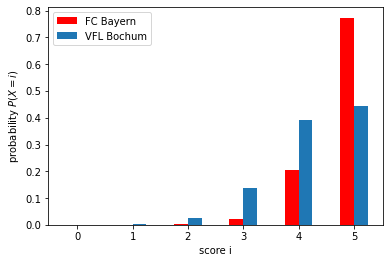

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 5 # number of penalties
x = np.arange(n+1)
p_fcb = binom.pmf(x, n, 0.95) # number of goals follows a binomial distribution
p_vfl = binom.pmf(x, n, 0.85)

plt.bar(x, p_fcb, width=-0.25, align='edge', color='r', label='FC Bayern')
plt.bar(x, p_vfl, width=0.25, align='edge', label='VFL Bochum')
plt.xlabel('score i')
plt.ylabel('probability $P(X=i)$')
plt.legend();

## Joint Probability Mass Function (PMF)
We are considering the joint probability mass function $P(X_1=i,X_2=j)$ that FC Bayern scores $i$ goals and VFL scores $j$ goals. The probabilities are independent of each other.

$
P(X_1=i,X_2=j) = P(X_1=i)\cdot P(X_2=j)
$

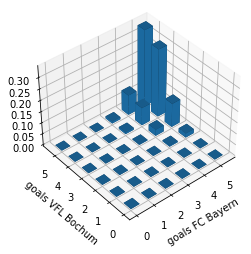

In [9]:
from mpl_toolkits.mplot3d import Axes3D

p_joint = p_fcb.reshape(6,1) @ p_vfl.reshape(1,6)
fig = plt.figure()
ax = fig.gca(projection = '3d')

xpos, ypos = np.meshgrid(x, x)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(xpos)
dy = dx.copy()
dz = p_joint.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.view_init(elev=40, azim=230)

plt.xlabel('goals FC Bayern ')
plt.ylabel('goals VFL Bochum');

What is the probability that VFL Bochum wins: $P(X_1>X_2)$?